In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist=fetch_openml('mnist_784',version=1,cache=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x,y=mnist["data"],mnist["target"]

In [ ]:
print(x.shape)

(70000, 784)


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=x.to_numpy()[26000]

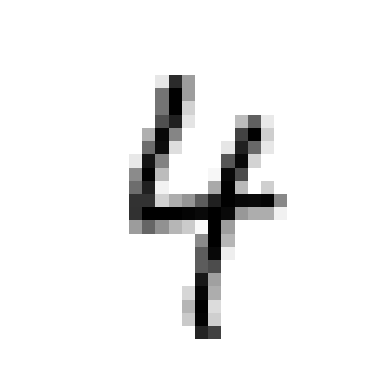

In [ ]:
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [ ]:
print(y_train)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [ ]:
import numpy as np
y_train=y_train.astype(np.int8)
print(y_train)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int8


In [ ]:
y_train_4=(y_train==4)
print(y_train_4)

0        False
1        False
2         True
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


In [ ]:
y_test_4=(y_test==4)
print(y_test_4)

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(x_train,y_train_4)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring="accuracy")

array([0.9671 , 0.97645, 0.9687 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]])

In [ ]:
#Measuring Accuracy Using Precision and Recall 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.8149175527816305

In [ ]:
recall_score(y_train_4, y_train_pred) 

0.905169462512838

In [ ]:
# Measuring Accuracy Using F1 score.
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_pred)

0.8576757764982564